In [1]:
from keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

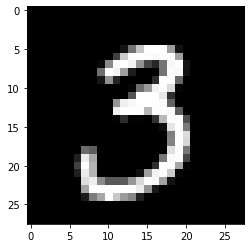

In [5]:
plt.imshow(X_test[90],cmap='gray')
plt.show()

In [6]:
y_test[90]

3

In [7]:
X = X_test.reshape((-1,28*28))

In [8]:
X.shape

(10000, 784)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
# standardisation and normalisation
X_ = sc.fit_transform(X)

In [12]:
import numpy as np

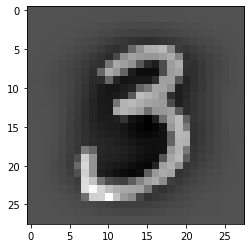

In [13]:
plt.imshow(X_[90].reshape((28,28)),cmap='gray')
plt.show()

## Using Sklearn to implement PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
Z_pca = pca.fit_transform(X_)

In [17]:
Z_pca.shape

(10000, 2)

In [18]:
Z_pca

array([[-5.45831535,  6.41412019],
       [ 2.8044737 , -8.02916388],
       [-7.41124822, -3.86400746],
       ...,
       [-5.00437711,  1.15397763],
       [-1.42080826, -4.42360652],
       [13.14268424, -4.26267824]])

In [19]:
# tells how much of each component explains the variance
pca.explained_variance_

array([41.39893397, 28.35105806])

## Custom PCA
**Steps :**

---
1. Standardise the data
2. Find Covariance matrix
3. Compute eigen vectors using svd

### Step 2.

In [20]:
covar = np.dot(X_.T,X_)

In [21]:
covar.shape

(784, 784)

### Step 3.

In [22]:
from numpy.linalg import svd

In [23]:
U,S,V = svd(covar)

In [24]:
U.shape

(784, 784)

In [25]:
U_red = U[:,:2]

### Step 4.

In [26]:
Z_custom_pca = np.dot(X_,U_red)

In [27]:
Z_custom_pca.shape

(10000, 2)

In [28]:
Z_custom_pca

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

In [29]:
Z_pca

array([[-5.45831535,  6.41412019],
       [ 2.8044737 , -8.02916388],
       [-7.41124822, -3.86400746],
       ...,
       [-5.00437711,  1.15397763],
       [-1.42080826, -4.42360652],
       [13.14268424, -4.26267824]])

## Visualise Data

In [30]:
import pandas as pd

In [31]:
Z_pca.shape

(10000, 2)

In [32]:
y_test.shape

(10000,)

In [33]:
data = np.hstack((Z_pca,y_test.reshape(-1,1)))

In [34]:
data.shape

(10000, 3)

In [35]:
df = pd.DataFrame(data,columns=['PC1','PC2','Label'])

In [36]:
df.head()

,PC1,PC2,Label
0,-5.458315,6.414120,7.0
1,2.804474,-8.029164,2.0
2,-7.411248,-3.864007,1.0
3,8.751240,0.045837,0.0
4,-0.065747,6.296046,4.0


In [37]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

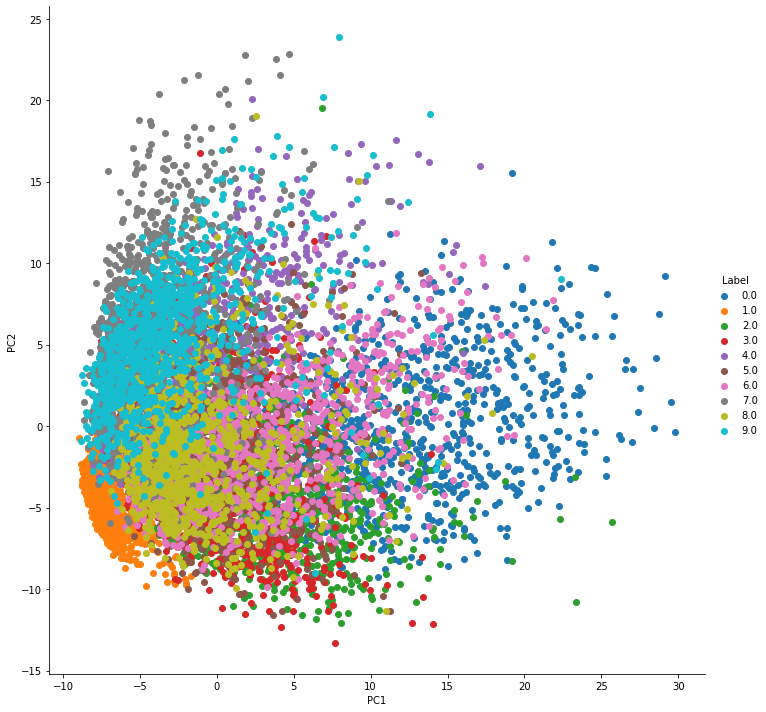

In [38]:
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(df,hue='Label',height=10)
fg.map(plt.scatter,'PC1','PC2')
fg.add_legend()
plt.show()

## PCA with 784 dimensions

In [39]:
pca = PCA()

In [40]:
Z_pca = pca.fit_transform(X_)

In [41]:
Z_pca.shape

(10000, 784)

In [42]:
pca.explained_variance_

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [43]:
# explained_variance_ratio_ = explained_variance_/(sum(explained_variance_))
pca.explained_variance_ratio_

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [44]:
c_sum = np.cumsum(pca.explained_variance_ratio_)

In [45]:
c_sum

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

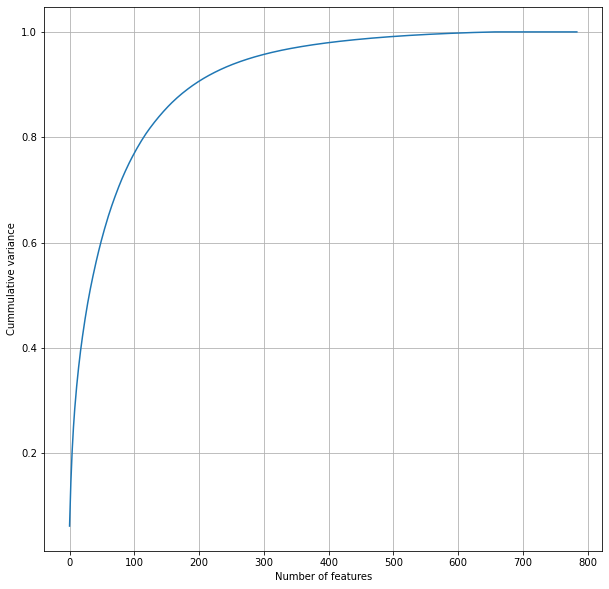

In [46]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(c_sum)
plt.ylabel("Cummulative variance")
plt.xlabel("Number of features")
plt.show()